In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import requests
from bs4 import BeautifulSoup
from sklearn.neural_network import MLPRegressor

In [60]:
sns.set(style="whitegrid")

Method 1: Downloaded Dataset from Kaggle

In [61]:
df = pd.read_csv('FeatureAndMetadata_Milling.csv', delimiter=';', header=1)

In [62]:
df.head()

,Accelerometer - Spindle +Y - min,Accelerometer - Spindle -Z - min,Accelerometer - Spindle -X - min,Accelerometer - X Driving axle +Z - min,Accelerometer - X Driving axle -X - min,Accelerometer - Y Driving axle +Z - min,Accelerometer - Y Driving axle +Y - min,Accelerometer - Y Driving axle -X - min,Current - Spindle L1 - min,Current - Spindle L2 - min,...,NumberOfCycle,SampleIndex,TollIndex,MillingToolType,ADOC,RDOC,HardnessMean,ToolHolderLength,CycleToFailure,CycleToFailureNormalized
0,-20620.0,-2004.0,-2097.0,-193.0,-192.0,-156.0,-115.0,-168.0,2196.0,2211.0,...,1,2,2,1,5,8,"36,67",80,49,1
1,-19272.0,-1122.0,-1841.0,-179.0,-213.0,-173.0,-126.0,-97.0,2121.0,1933.0,...,2,2,2,1,5,8,"36,67",80,48,"0,979591837"
2,-14630.0,-1216.0,-1418.0,-849.0,-794.0,-602.0,-557.0,-664.0,1966.0,1783.0,...,3,2,2,1,5,8,"36,67",80,47,"0,959183673"
3,-15920.0,-1191.0,-2142.0,-201.0,-357.0,-217.0,-118.0,-196.0,1917.0,1717.0,...,4,2,2,1,5,8,"36,67",80,46,"0,93877551"
4,-20374.0,-2623.0,-1824.0,-340.0,-528.0,-361.0,-171.0,-380.0,2586.0,2004.0,...,5,2,2,1,5,8,"36,67",80,45,"0,918367347"


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Columns: 131 entries, Accelerometer - Spindle +Y - min to CycleToFailureNormalized
dtypes: float64(120), int64(7), object(4)
memory usage: 990.8+ KB


In [64]:
df.describe()

,Accelerometer - Spindle +Y - min,Accelerometer - Spindle -Z - min,Accelerometer - Spindle -X - min,Accelerometer - X Driving axle +Z - min,Accelerometer - X Driving axle -X - min,Accelerometer - Y Driving axle +Z - min,Accelerometer - Y Driving axle +Y - min,Accelerometer - Y Driving axle -X - min,Current - Spindle L1 - min,Current - Spindle L2 - min,...,Current - Driving axle Z L1 - kurtosis,Current - Driving axle Z L2 - kurtosis,Current - Driving axle Z L3 - kurtosis,NumberOfCycle,SampleIndex,TollIndex,MillingToolType,ADOC,ToolHolderLength,CycleToFailure
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,...,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,-16880.759298,-1541.799587,-2434.217975,-329.235537,-322.557851,-284.709711,-225.394628,-384.438017,57732.230372,57841.924587,...,18.099886,18.011837,17.973186,49.522727,39.227273,41.597107,1.362603,6.957645,81.322314,48.520661
std,3628.143307,2597.591245,2672.544202,206.375518,231.869853,173.921203,129.923123,215.515750,62167.586758,62257.785475,...,20.493936,20.089953,20.691992,35.863430,40.765935,46.383644,0.481000,2.441723,10.205106,35.988416
min,-32768.000000,-32768.000000,-32768.000000,-3446.000000,-2679.000000,-2860.000000,-1864.000000,-3470.000000,309.000000,436.000000,...,-1.275765,-1.224921,-1.094802,1.000000,2.000000,2.000000,1.000000,5.000000,80.000000,0.000000
25%,-19328.000000,-1440.000000,-2413.250000,-376.500000,-374.000000,-319.000000,-259.250000,-448.000000,2005.000000,2079.750000,...,3.949190,4.326742,4.011511,20.000000,12.000000,7.000000,1.000000,5.000000,80.000000,19.000000
50%,-17830.000000,-1089.500000,-1872.000000,-285.000000,-276.000000,-254.000000,-197.000000,-357.500000,3009.000000,3135.500000,...,7.537298,7.918889,7.341939,42.000000,17.000000,9.000000,1.000000,5.000000,80.000000,41.000000
75%,-15202.500000,-882.000000,-1600.000000,-234.750000,-197.500000,-216.750000,-165.750000,-286.000000,127912.250000,128136.500000,...,33.618995,31.852141,31.819041,74.000000,41.000000,102.000000,2.000000,10.000000,80.000000,73.000000
max,-5576.000000,-526.000000,-1168.000000,-107.000000,-108.000000,-62.000000,-67.000000,-74.000000,129252.000000,129017.000000,...,156.428940,162.174018,183.097342,150.000000,119.000000,105.000000,2.000000,10.000000,160.000000,149.000000


In [65]:
df.drop_duplicates(inplace=True)

In [66]:
df.fillna(method='ffill', inplace=True)

In [67]:
print("Shape after cleaning:", df.shape)

Shape after cleaning: (968, 131)


In [68]:
current_cols = [col for col in df.columns if 'Current' in col and 'mean' in col]
df['Mean_Current_Total'] = df[current_cols].mean(axis=1)

In [69]:
df['ToolTypeEncoded'] = df['MillingToolType'].astype('category').cat.codes

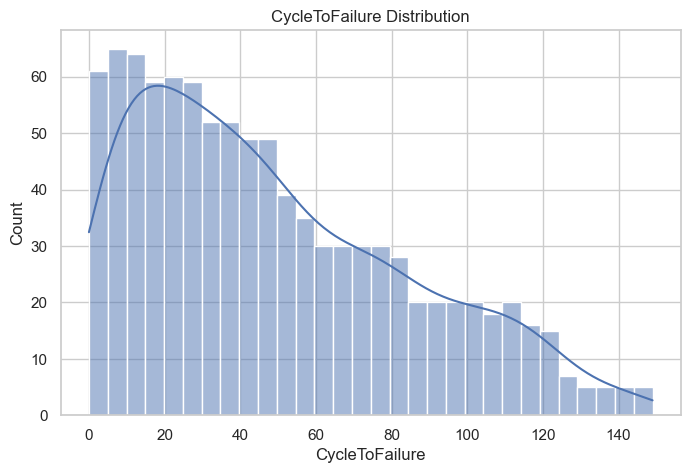

In [70]:
plt.figure(figsize=(8, 5))
sns.histplot(df['CycleToFailure'], bins=30, kde=True)
plt.title('CycleToFailure Distribution')
plt.show()

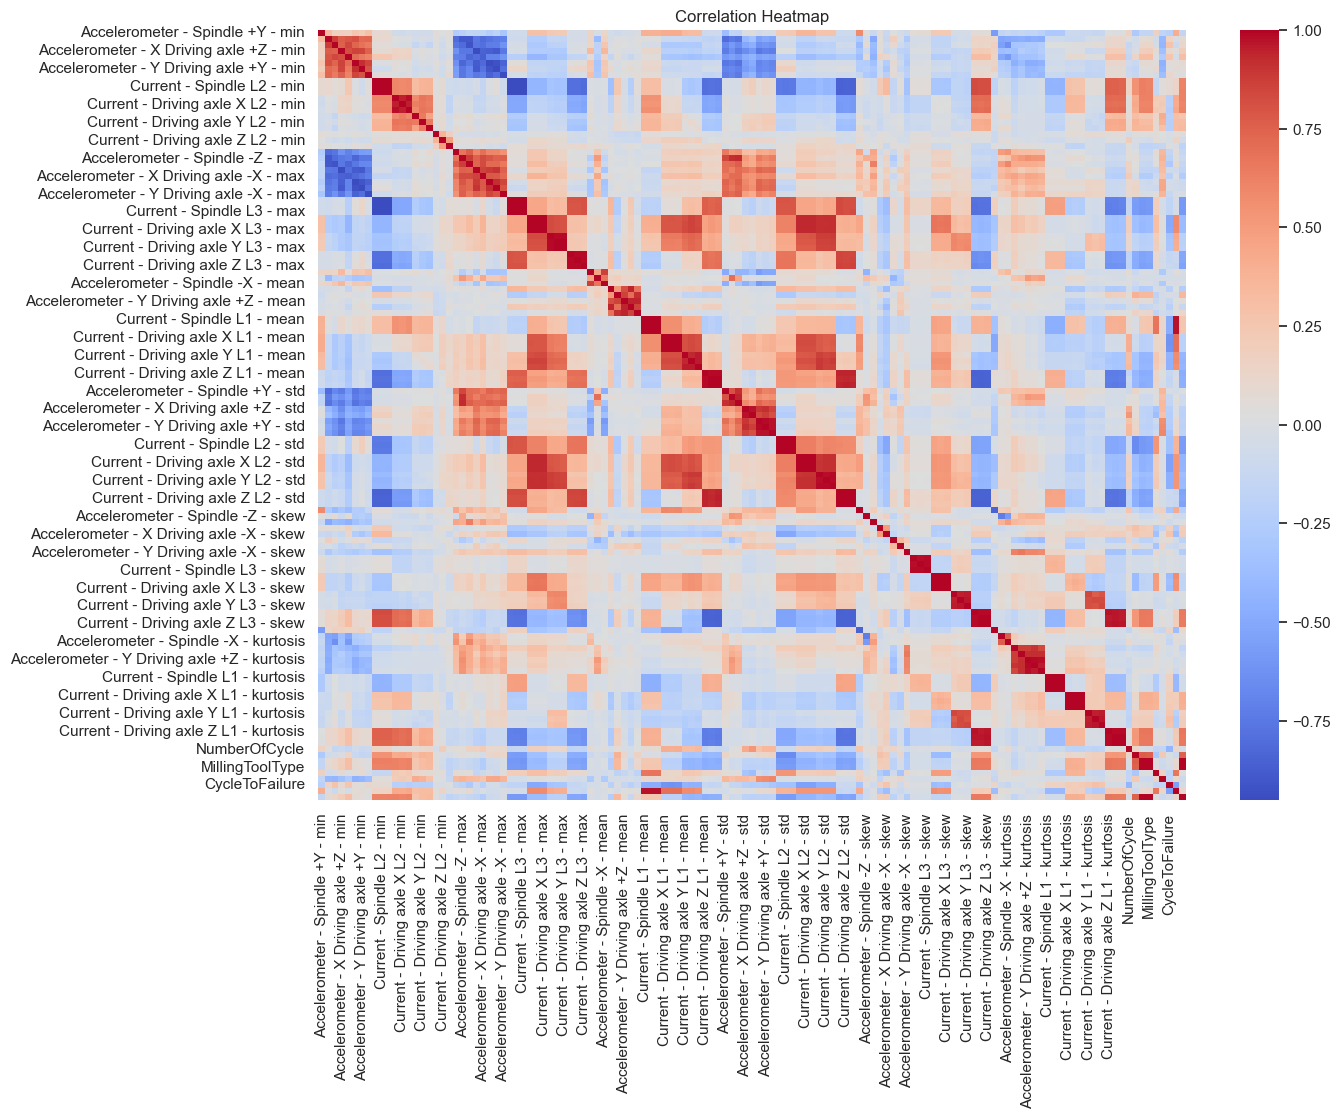

In [71]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [72]:
# Columns likely affected
numeric_cols = ['ADOC', 'RDOC', 'HardnessMean', 'ToolHolderLength', 'CycleToFailure', 'CycleToFailureNormalized']

# Converted comma to dot and then to float
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

target = 'CycleToFailure'
features = ['ToolTypeEncoded', 'ADOC', 'RDOC', 'ToolHolderLength', 'HardnessMean', 'Mean_Current_Total']
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [73]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 12.72
RMSE: 16.76


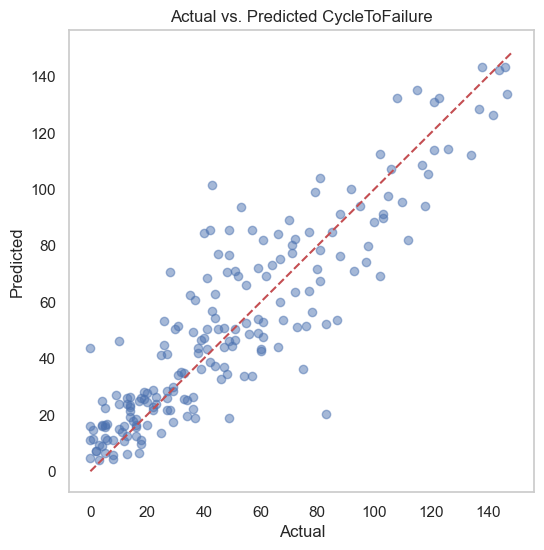

In [74]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted CycleToFailure')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()

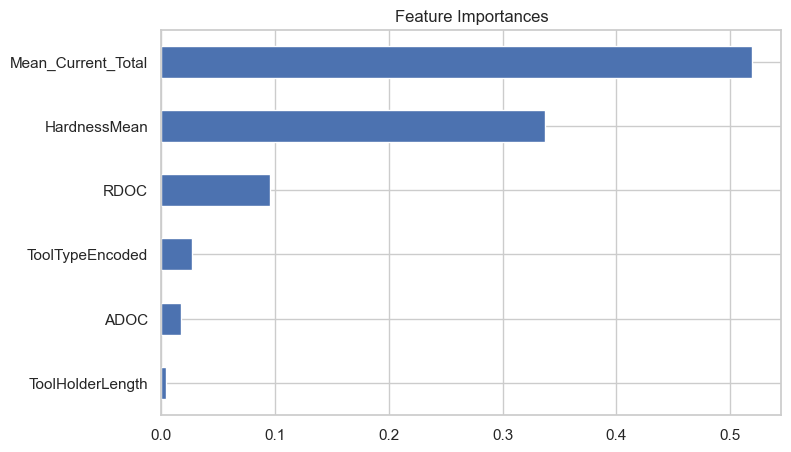

In [75]:
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', title='Feature Importances', figsize=(8, 5))
plt.show()

Method 2: Scraped data from Xometry

In [76]:
url = "https://www.xometry.com/resources/machining/milling-cost-estimator/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
tables = soup.find_all('table')

In [77]:
# Manual fallback data in case of scrape failure
fallback_data = [
    ['Aluminum 6061', '2x2x2', '15', '35'],
    ['Aluminum 7075', '3x3x1.5', '20', '55'],
    ['Stainless Steel', '2x4x1', '25', '65'],
    ['Brass', '1x1x1', '10', '30'],
    ['Plastic', '2x2x0.5', '8', '20']
]


# Extract data from the first table or fallback
data = []
if tables:
    rows = tables[0].find_all('tr')[1:]
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip().replace('$', '').replace(',', '') for ele in cols]
        if len(cols) >= 4:
            data.append(cols[:4])
if not data:
    data = fallback_data

In [78]:
scraped_df = pd.DataFrame(data, columns=['Material', 'Dimensions', 'Estimated Time (min)', 'Estimated Cost ($)'])

# Convert numeric columns
scraped_df['Estimated Time (min)'] = scraped_df['Estimated Time (min)'].astype(float)
scraped_df['Estimated Cost ($)'] = scraped_df['Estimated Cost ($)'].astype(float)

# Parse dimensions
dim_split = scraped_df['Dimensions'].str.extract(r'(\d+(?:\.\d+)?)x(\d+(?:\.\d+)?)x(\d+(?:\.\d+)?)')
scraped_df[['Length', 'Width', 'Height']] = dim_split.astype(float)
scraped_df.drop(columns=['Dimensions'], inplace=True)

In [79]:
scraped_df['Volume'] = scraped_df['Length'] * scraped_df['Width'] * scraped_df['Height']
scraped_df['CostPerVolume'] = scraped_df['Estimated Cost ($)'] / scraped_df['Volume']
scraped_df['MaterialEncoded'] = scraped_df['Material'].astype('category').cat.codes

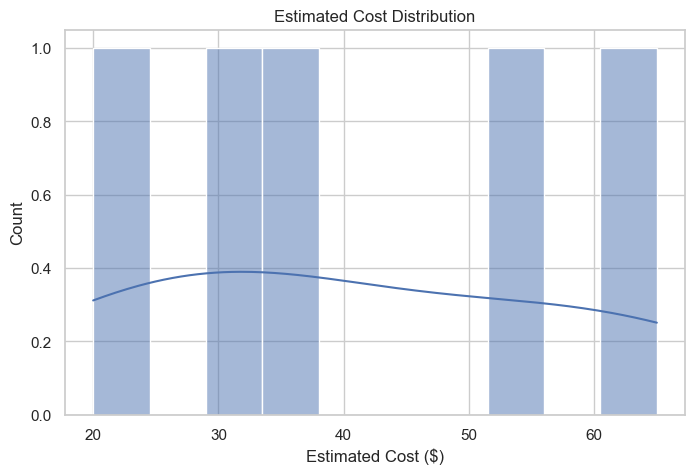

In [80]:
plt.figure(figsize=(8, 5))
sns.histplot(scraped_df['Estimated Cost ($)'], bins=10, kde=True)
plt.title('Estimated Cost Distribution')
plt.show()

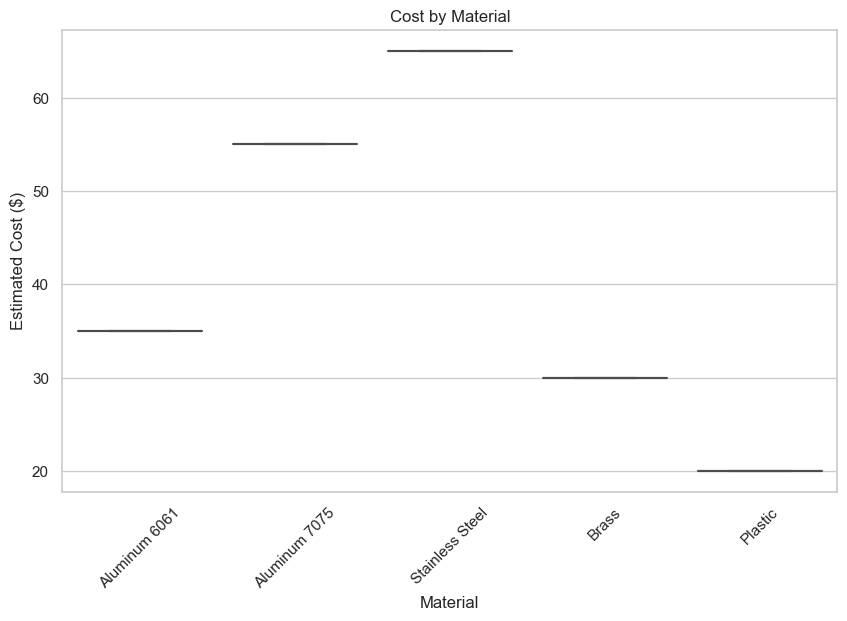

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Material', y='Estimated Cost ($)', data=scraped_df)
plt.title('Cost by Material')
plt.xticks(rotation=45)
plt.show()

In [82]:
features = ['MaterialEncoded', 'Estimated Time (min)', 'Volume']
target = 'Estimated Cost ($)'
X = scraped_df[features]
y = scraped_df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [83]:
model = MLPRegressor(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\91832\.ipython\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE: 12.54
RMSE: 12.54


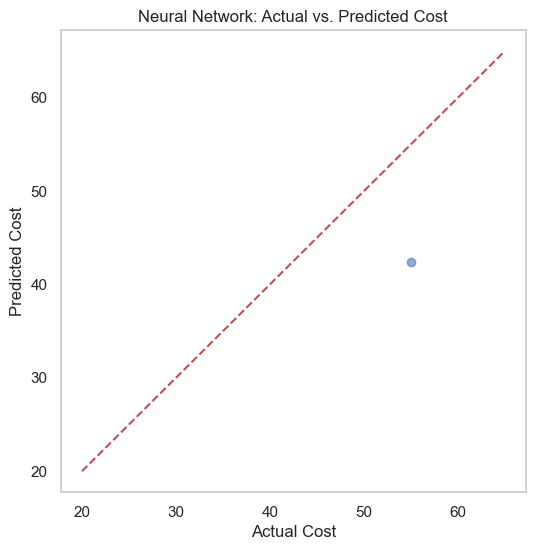

In [84]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Neural Network: Actual vs. Predicted Cost')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()